Clustering
===
Bothound project. 

#Read the features from file

In [3]:
import numpy as np

np.zeros([30000, 2000])
len(np.zeros([30000, 2000]))
filename = 'feature_db-files.txt'
file = open(filename)

empty_list =[]   

for line in file:
    splitted_line = line.split(') {')

    useful_part = splitted_line[1]
    useful_part = useful_part[:-2]
    new_split = useful_part.split(', ')

    num_list =[]   
    for b in new_split:
       c = b.split(': ')[1]
       num_list.append(float(c))
    empty_list.append(num_list) 

X = np.array(empty_list)

#Clustering

In [49]:
import sklearn
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist,pdist
from scipy.signal import argrelextrema

In [50]:
# perform PCA dimensionality reduction
#pca = RandomizedPCA(n_components=2).fit(data['data'])
#X = pca.transform(data['data'])

In [51]:
#totss = sum(pdist(X)**2)/X.shape[0]       # The total sum of squares
#print "totl ss", totss

#Elbow method

In [245]:
def get_best_clustering_model(X, max_number_of_clusters):
    cost = []
    KK = range(1,max_number_of_clusters+1)
    kms = []
    # calculate all the clustering and cost
    for no_of_clusters in KK:
        km = KMeans(n_clusters=no_of_clusters, precompute_distances = True, max_iter = 500, n_init = 30)
        km.fit(X)
        kms.append(km)

        #centroids = km.cluster_centers_ 
        #distances = cdist(X, centroids, 'euclidean')
        #cIdx = np.argmin(distances,axis=1) 
        #dist = np.min(distances,axis=1) 
        #tot_withinss = sum(dist**2)  # Total within-cluster sum of squares

        #cost.append(tot_withinss / X.shape[0]) 
        cost.append(km.inertia_)
    
    # calculate first derivative
    derivative1 = [cost[i+1]-cost[i] for i in range(len(cost)-1)]
    #print derivative1
        
    # calculate second derivative
    derivative2 = [derivative1[i+1]-derivative1[i] for i in range(len(derivative1)-1)]
    #print derivative2
    
    max2 = argrelextrema(np.argsort(derivative2), np.less) 
    num_clusters = 4 
    if(len(max2[0]) > 0):
        num_clusters = max2[0][0] + 3
    else:
        # calculate third derivative
        derivative3 = [derivative2[i+1]-derivative2[i] for i in range(len(derivative2)-1)]
        #print derivative3

        max3 = argrelextrema(np.argsort(derivative3), np.greater) 
        if(len(max3[0]) > 0):
            num_clusters = max3[0][0] + 4 
        
    return kms[num_clusters-1], cost


In [263]:
max_number_of_clusters = 14
model,cost = get_best_clustering_model(X, max_number_of_clusters)

In [264]:
num_clusters = model.n_clusters
print num_clusters

5


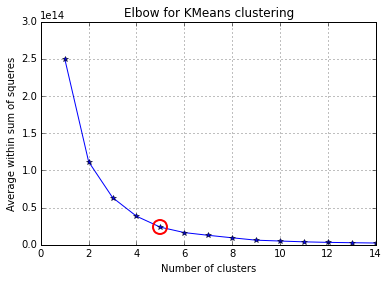

In [265]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm

KK = range(1,max_number_of_clusters+1)

# elbow curve
kIdx = num_clusters      
clr = cm.spectral( np.linspace(0,1,10) ).tolist()
mrk = 'os^p<dvh8>+x.'

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, cost, 'b*-')
ax.plot(num_clusters, cost[num_clusters-1], marker='o', markersize=14, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
#ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
#plt.ylabel('Percentage of variance explained (%)')
plt.ylabel('Average within sum of squeres')
plt.title('Elbow for KMeans clustering')



#Find the maximum cluster

In [266]:
def get_max_cluster_size_in_percentage(X, model):
    sizes = [0]*model.n_clusters

    for i in model.predict(X): 
        sizes[i] = sizes[i]+1
    print sizes
    index_max = sizes.index(max(sizes))

    return float(sizes[index_max])/ X.shape[0] * 100

In [262]:
print get_max_cluster_size_in_percentage(X, model)


[20552, 4, 62, 1036, 10]
94.8670605613


#DBSCAN clustering

In [6]:
from sklearn.cluster import DBSCAN

In [52]:
# Compute DBSCAN
db = DBSCAN(eps=0.1, min_samples=20).fit(X)

In [53]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)


Estimated number of clusters: 51


In [64]:
len(labels)

21664

(array([ 17761.,    104.,     55.,    935.,    309.,     33.,    208.,
            58.,     36.,    197.,     21.,     24.,     38.,     21.,
           291.,    163.,    106.,     46.,    128.,     20.,     59.,
            34.,     27.,     29.,     24.,     44.,     28.,     23.,
            27.,     26.,     25.,     21.,     53.,     54.,     25.,
           165.,     67.,     20.,     26.,     43.,     25.,     29.,
            26.,     20.,     27.,     22.,     24.,     21.,     21.,
            24.,     24.,     27.]),
 array([ -1.00000000e+00,  -1.92307692e-02,   9.61538462e-01,
          1.94230769e+00,   2.92307692e+00,   3.90384615e+00,
          4.88461538e+00,   5.86538462e+00,   6.84615385e+00,
          7.82692308e+00,   8.80769231e+00,   9.78846154e+00,
          1.07692308e+01,   1.17500000e+01,   1.27307692e+01,
          1.37115385e+01,   1.46923077e+01,   1.56730769e+01,
          1.66538462e+01,   1.76346154e+01,   1.86153846e+01,
          1.95961538e+01,   2.05

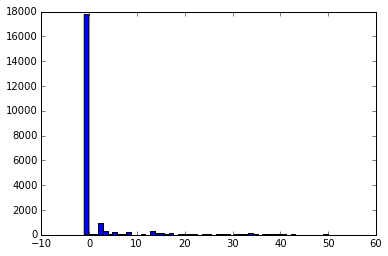

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(labels, bins = n_clusters_+1)